In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

In [5]:
# Import the data
file_path = Path("Resources/lending_data.csv")
lending_df = pd.read_csv(file_path)
lending_df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [6]:
# Split the data into X_train, X_test, y_train, y_test
y = lending_df[['loan_status']]
X = lending_df[['loan_size', 'interest_rate', 'debt_to_income', 'num_of_accounts', 'derogatory_marks', 'total_debt']]
X_train, X_test, y_train, y_test = train_test_split(X,y)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Train a Logistic Regression model print the model score
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
#Logistic Regression: Model Score
print(f"Training Score: : {classifier.score(X_train, y_train)}")
print(f"Test Score: : {classifier.score(X_test, y_test)}")

Training Score: : 0.9916769844545329
Test Score: : 0.9921584812216261


c:\Users\idean\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
#Confusion Matrix
y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)


array([[18636,    86],
       [   66,   596]], dtype=int64)

In [10]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9921584812216261


In [11]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18722
           1       0.87      0.90      0.89       662

    accuracy                           0.99     19384
   macro avg       0.94      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



In [12]:
# Data Creation
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Train a Random Forest Classifier model and print the model score
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)

C:\Users\idean\AppData\Local\Temp\ipykernel_12676\1477232774.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)


In [14]:
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9975409272252029
Testing Score: 0.9917457697069748


[1.68281143e-01 3.11504547e-01 1.88884656e-01 1.08351995e-01
 1.11781830e-04 2.22865877e-01]


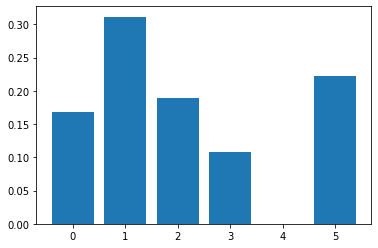

In [15]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [16]:
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()
sel.transform(X)

c:\Users\idean\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
c:\Users\idean\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


array([[1.07000000e+04, 7.67200000e+00, 4.31818182e-01, 2.28000000e+04],
       [8.40000000e+03, 6.69200000e+00, 3.11926606e-01, 1.36000000e+04],
       [9.00000000e+03, 6.96300000e+00, 3.49240781e-01, 1.61000000e+04],
       ...,
       [1.76000000e+04, 1.05950000e+01, 6.26400996e-01, 5.03000000e+04],
       [1.63000000e+04, 1.00680000e+01, 6.01593625e-01, 4.53000000e+04],
       [1.56000000e+04, 9.74200000e+00, 5.85062241e-01, 4.23000000e+04]])

In [17]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

c:\Users\idean\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [18]:
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9942908240473243
Testing Score: 0.9936545604622369


c:\Users\idean\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9942908240473243
Testing Score: 0.9936545604622369


c:\Users\idean\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
rf2 = RandomForestClassifier(max_depth=1)
rf2.fit(X_selected_train_scaled,y_train)
print(f'Training Score: {rf2.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {rf2.score(X_selected_test_scaled, y_test)}')

C:\Users\idean\AppData\Local\Temp\ipykernel_12676\3599261299.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2.fit(X_selected_train_scaled,y_train)


Training Score: 0.9946175539964232
Testing Score: 0.9938609162195625


To my understanding, both models seem to perform well and there is not much difference between them.